In [1]:
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# [0] <font color='red'>Load Data

In [2]:
from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open(path +"X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open(path +"X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open(path +"X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open(path +"Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open(path +"Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open(path +"Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

with open(path + "train_avgw2v.txt", "rb") as file:
    train_avgw2v = pickle.load(file)
with open(path + "cv_avgw2v.txt", "rb") as file:
    cv_avgw2v = pickle.load(file)
with open(path + "test_avgw2v.txt", "rb") as file:
    test_avgw2v = pickle.load(file)

with open(path + "train_tfw2v.txt", "rb") as file:
    train_tfw2v = pickle.load(file)
with open(path + "cv_tfw2v.txt", "rb") as file:
    cv_tfw2v = pickle.load(file)
with open(path + "test_tfw2v.txt", "rb") as file:
    test_tfw2v = pickle.load(file)
    

# [5] Assignment 5: Apply Logistic Regression

<ol>
    <li><strong>Apply Logistic Regression on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Pertubation Test</strong>
        <ul>
    <li>Get the weights W after fit your model with the data X.</li>
    <li>Add a noise to the X (X' = X + e) and get the new data set X' (if X is a sparse
matrix, X.data+=e)</li>
    <li>Fit the model again on data X' and get the weights W'</li>
    <li>Add a small eps value(to eliminate the divisible by zero error) to W and W’ i.e
W=W+10^-6 and W’ = W’+10^-6</li>
    <li>Now find the % change between W and W' (| (W-W') / (W) |)*100)</li>
    <li>Calculate the 0th, 10th, 20th, 30th, ...100th percentiles, and observe any sudden rise in the values of percentage_change_vector</li>
    <li> Ex: consider your 99th percentile is 1.3 and your 100th percentiles are 34.6, there is sudden rise from 1.3 to 34.6, now calculate the 99.1, 99.2, 99.3,..., 100th percentile values and get the proper value after which there is sudden rise the values, assume it is 2.5</li>
            <li> Print the feature names whose % change is more than a threshold x(in our example it's 2.5)</li>
        </ul>
    </li>
    <br>
    <li><strong>Sparsity</strong>
        <ul>
    <li>Calculate sparsity on weight vector obtained after using L1 regularization</li>
        </ul>
    </li>
    <br><font color='red'>NOTE: Do sparsity and multicollinearity for any one of the vectorizers. Bow or tf-idf is recommended.</font>
    <br>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 10 important features for both positive and negative classes separately.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Logistic Regression

In [3]:

def LR_all(train,test,cv,penal):
    #Calculation LR for different k values
    auc_train = []
    auc_cv = []
    a = [0.001, 0.01, 0.1, 1, 10, 100,1000]
    
    print("Starting classifier...")
    for i in tqdm(a):
        LR = LogisticRegression(penalty=penal,C=i)
        LR.fit(train,Y_train)

        pred_prob = LR.predict_proba(cv)
        pred_prob_train = LR.predict_proba(train)

        #acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
        auc_cv.append(roc_auc_score(Y_cv, pred_prob[:,1]))
        auc_train.append(roc_auc_score(Y_train, pred_prob_train[:,1]))

    #Plotting the AUC curve for train and test data

    #Print the graph

   # https://stackoverflow.com/questions/28077499/matplotlib-pyplot-plot-x-axis-ticks-in-equal-range 


    x2 = np.arange(len(a))
    plt.plot(x2,auc_train,'r', label = 'Train Data')
    plt.plot(x2,auc_cv,'b', label = 'CV Data')
    plt.xticks(x2, a)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values for Train and CV Data\n")
    plt.xlabel("Hyper Parameter(C)")
    plt.ylabel("AUC Value")
    plt.show()


    #Get k value for max auc in cv data
    mx = 0
    for i in range(len(auc_cv)):
        if(auc_cv[i]> auc_cv[mx]):
            mx = i
    opt = a[mx] 
    print("The optimal value of C = ", opt)

    print("\nClassifying Test Data\n\n")
    LR = LogisticRegression(penalty=penal,C=opt)
    LR.fit(train,Y_train)

    pred = LR.predict(test)
    pred_prob = LR.predict_proba(test)

    #pred_train = LR.predict(X_train_vec)
    pred_prob_train = LR.predict_proba(train)

    #ROC Values comutation
    fpr, tpr, threshold = roc_curve(Y_train, pred_prob_train[:,1])
    fpr1, tpr1, threshold1 = roc_curve(Y_test, pred_prob[:,1])
    print("The AUC value for test data is ",roc_auc_score(Y_test, pred_prob[:,1]))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()
    
    if(penal == 'l1'):
        w = LR.coef_
        a = np.count_nonzero(w)
        b = w.size
        print("\n\nSparsity on weight vector obtained using L1 regularization is : ",(b-a)/b*100)
        

## [5.1] Logistic Regression on BOW,<font color='red'> SET 1</font>

### [5.1.1] Applying Logistic Regression with L1 regularization on BOW,<font color='red'> SET 1</font>

#### [5.1.1.1] Calculating sparsity on weight vector obtained using L1 regularization on BOW,<font color='red'> SET 1</font>

Starting classifier...


100%|███████████████████████████████████████████| 7/7 [17:02<00:00, 305.49s/it]


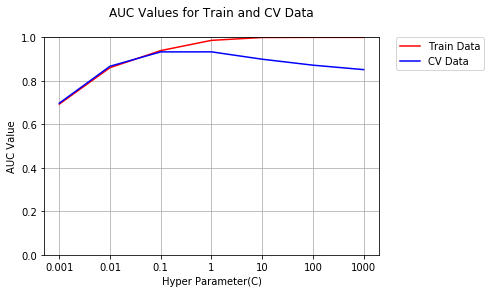

The optimal value of C =  1

Classifying Test Data


The AUC value for test data is  0.9277652691434297


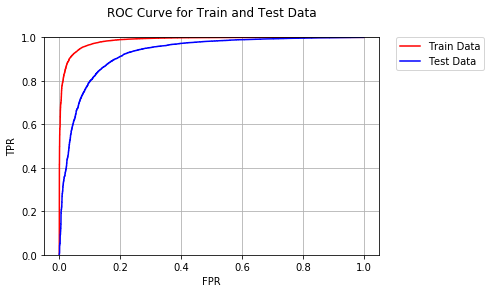

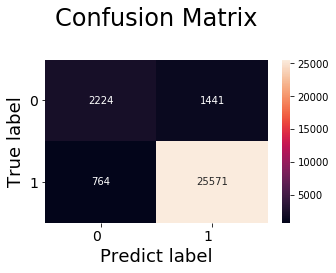



Sparsity on weight vector obtained using L1 regularization is :  91.16989390551406


In [31]:
# Please write all the code with proper documentation
LR_all(train_bow,test_bow,cv_bow,'l1')

### [5.1.2] Applying Logistic Regression with L2 regularization on BOW,<font color='red'> SET 1</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:59<00:00, 12.13s/it]


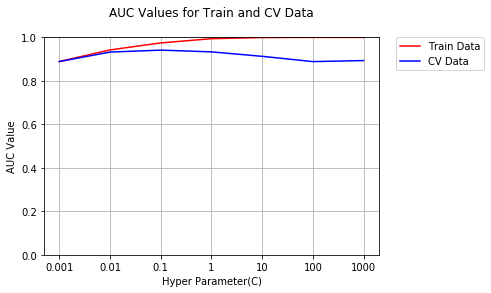

The optimal value of C =  0.1

Classifying Test Data


The AUC value for test data is  0.9335063878130221


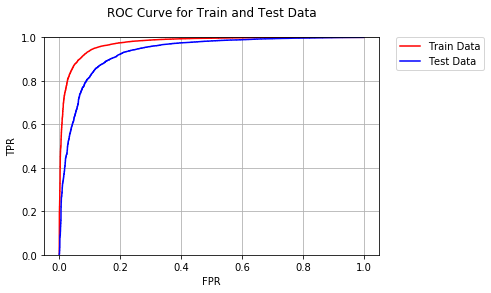

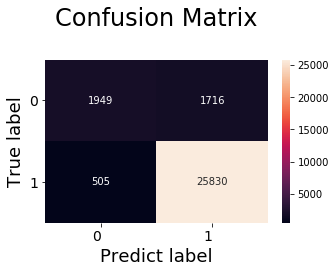

In [32]:
# Please write all the code with proper documentation
LR_all(train_bow,test_bow,cv_bow,'l2')

#### [5.1.2.1] Performing pertubation test (multicollinearity check) on BOW,<font color='red'> SET 1</font>

In [5]:
# Please write all the code with proper documentation0

LR = LogisticRegression(penalty='l2',C=1)
LR.fit(train_bow,Y_train)
weight1 = LR.coef_ # weight vector

# Getting new data set by addind a small noise
new_train = train_bow.astype(float)
new_train.data += np.random.uniform(-0.0001,0.0001,1 )

# Fitting the model again on new data
LR = LogisticRegression(penalty='l2',C=1)
LR.fit(new_train,Y_train)
weight2 = LR.coef_

# Adding small esilon to weight vector to avoid division by 0
weight1 += 10**-6
weight2 += 10**-6

percentage_change_vector = abs( (weight1-weight2) / (weight1) )*100

0 th percentile :  4.84068802321408e-06
10 th percentile :  0.01757817245917479
20 th percentile :  0.03704522334560538
30 th percentile :  0.061931045529708975
40 th percentile :  0.09434682508555611
50 th percentile :  0.1434955026015432
60 th percentile :  0.23598616062651875
70 th percentile :  0.42664684241268636
80 th percentile :  0.9791142488476368
90 th percentile :  4.589916091050726
100 th percentile :  11354.709623390147


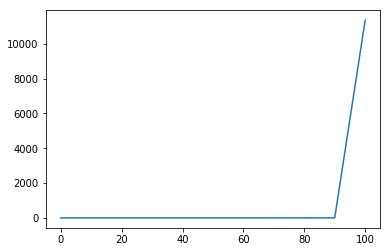

In [6]:
t = range(0,101,10)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

90 th percentile :  4.589916091050726
91 th percentile :  5.61509582798691
92 th percentile :  6.732906177677616
93 th percentile :  8.217859910272983
94 th percentile :  9.694903997847137
95 th percentile :  11.5557062799344
96 th percentile :  14.399437076594651
97 th percentile :  17.711572684337945
98 th percentile :  23.76901619399435
99 th percentile :  34.212277428350966
100 th percentile :  11354.709623390147


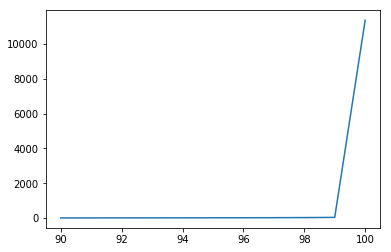

In [7]:
t = range(90,101,1)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

99.0 th percentile :  34.212277428350966
99.11111111111111 th percentile :  35.56590329122321
99.22222222222223 th percentile :  40.0735358540581
99.33333333333333 th percentile :  47.78175611839948
99.44444444444444 th percentile :  55.837697558280055
99.55555555555556 th percentile :  62.53462128459206
99.66666666666667 th percentile :  75.73913475067991
99.77777777777777 th percentile :  114.18529065776241
99.88888888888889 th percentile :  240.3657135612521
100.0 th percentile :  11354.709623390147


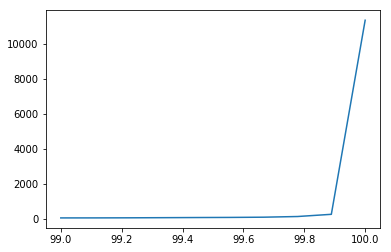

In [8]:
t = np.linspace(99,100,10)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

In [30]:
diff = (abs(weight1 - weight2)/weight1) * 100
q = diff[np.where(diff > 30)].size
print("Percentage of features which did not change by more than 30% is :",(weight1.size - q)/weight1.size*100)

Percentage of features which did not change by more than 30% is : 95.74432656168229


### Observation

**1. Since 5% of the features changed the values more than 30%, So we can say that there is no multicollinearity ** 

### [5.1.3] Feature Importance on BOW,<font color='red'> SET 1</font>

#### [5.1.3.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [25]:
# Please write all the code with proper documentation
LR = LogisticRegression(penalty='l2',C=1)
LR.fit(train_bow,Y_train)
feat_log = LR.coef_

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = count_vect.get_feature_names()


In [33]:
q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['pleasantly' 'beat' 'amazing' 'refreshing' 'highly' 'pero' 'awesome'
 'addictive' 'excellent' 'wonderfully']


#### [5.1.3.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [45]:
# Please write all the code with proper documentation
print("Top 10  important features of negative class",np.array(q.tail(10)['feature']))

Top 10  important features of negative class ['died' 'ruined' 'awful' 'disappointment' 'threw' 'terrible' 'canceled'
 'disappointing' 'sounded' 'worst']


## [5.2] Logistic Regression on TFIDF,<font color='red'> SET 2</font>

### [5.2.1] Applying Logistic Regression with L1 regularization on TFIDF,<font color='red'> SET 2</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:07<00:00,  1.29s/it]


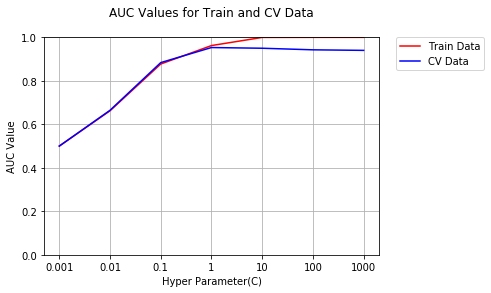

The optimal value of C =  1

Classifying Test Data


The AUC value for test data is  0.9466659224168812


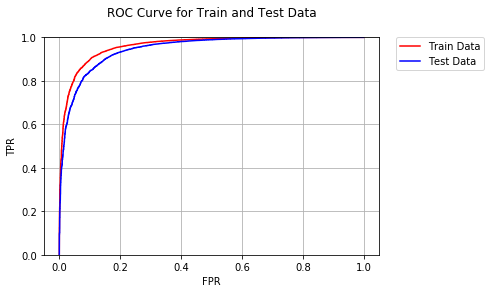

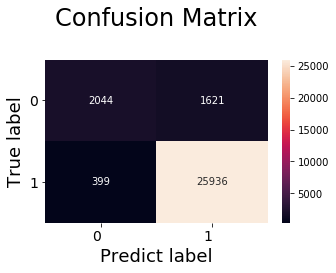



Sparsity on weight vector obtained using L1 regularization is :  96.2593787379028


In [33]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_tfidf,test_tfidf,cv_tfidf,'l1')

### [5.2.2] Applying Logistic Regression with L2 regularization on TFIDF,<font color='red'> SET 2</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:09<00:00,  1.80s/it]


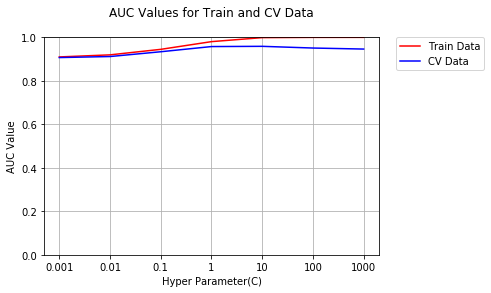

The optimal value of C =  10

Classifying Test Data


The AUC value for test data is  0.9561915771473182


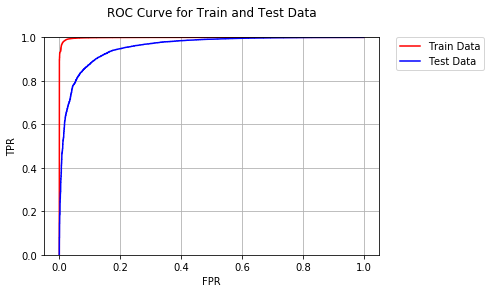

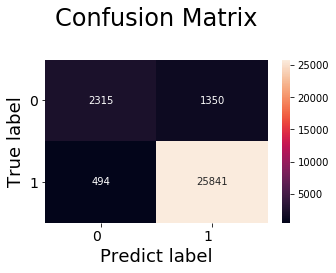

In [34]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_tfidf,test_tfidf,cv_tfidf,'l2')

### [5.2.3] Feature Importance on TFIDF,<font color='red'> SET 2</font>

#### [5.2.3.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [56]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR = LogisticRegression(penalty='l2',C=1)
LR.fit(train_tfidf,Y_train)
feat_log = LR.coef_

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
p = tf_idf_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = tf_idf_vect.get_feature_names()


In [57]:
q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['great' 'best' 'delicious' 'good' 'love' 'nice' 'wonderful' 'loves'
 'excellent' 'perfect']


#### [5.2.3.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [58]:
# Please write all the code with proper documentation
print("Top 10  important features of negative class",np.array(q.tail(10)['feature']))

Top 10  important features of negative class ['disappointment' 'not good' 'bland' 'awful' 'horrible' 'not worth'
 'terrible' 'worst' 'disappointed' 'not']


## [5.3] Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

### [5.3.1] Applying Logistic Regression with L1 regularization on AVG W2V<font color='red'> SET 3</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:15<00:00,  2.51s/it]


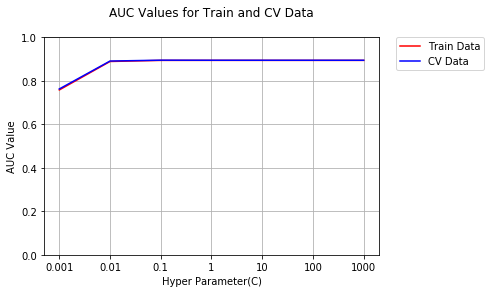

The optimal value of C =  0.1

Classifying Test Data


The AUC value for test data is  0.8916664262100944


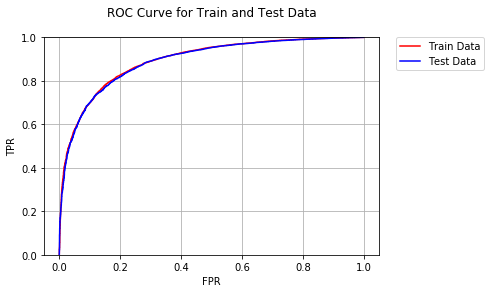

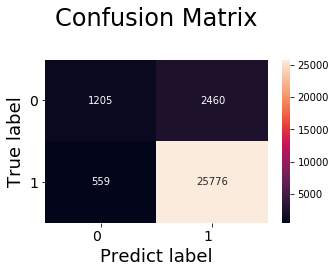



Sparsity on weight vector obtained using L1 regularization is :  10.0


In [35]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_avgw2v,test_avgw2v,cv_avgw2v,'l1')

### [5.3.2] Applying Logistic Regression with L2 regularization on AVG W2V,<font color='red'> SET 3</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:07<00:00,  1.10s/it]


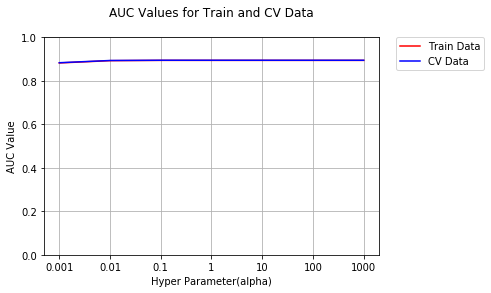

The optimal value of alpha =  0.1

Classifying Test Data


The AUC value for test data is  0.8914080282103478


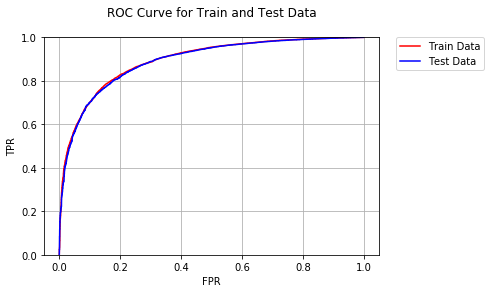

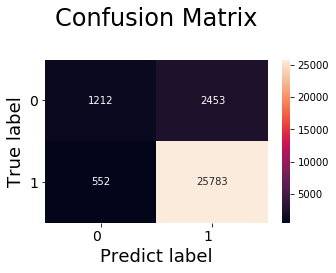

In [63]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_avgw2v,test_avgw2v,cv_avgw2v,'l2')

## [5.4] Logistic Regression on TFIDF W2V,<font color='red'> SET 4</font>

### [5.4.1] Applying Logistic Regression with L1 regularization on TFIDF W2V,<font color='red'> SET 4</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:14<00:00,  2.22s/it]


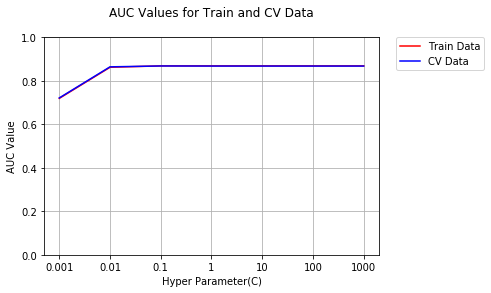

The optimal value of C =  0.1

Classifying Test Data


The AUC value for test data is  0.8637158958544164


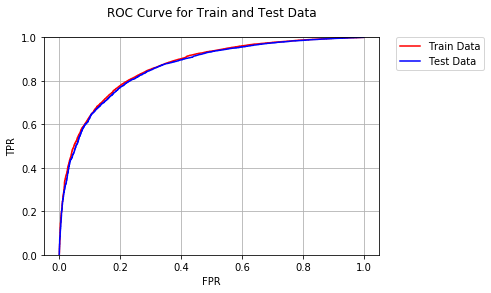

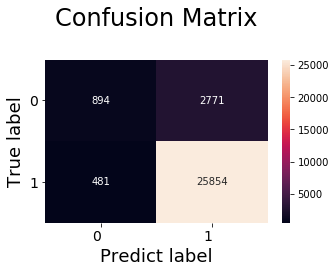



Sparsity on weight vector obtained using L1 regularization is :  6.0


In [36]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_tfw2v,test_tfw2v,cv_tfw2v,'l1')

### [5.4.2] Applying Logistic Regression with L2 regularization on TFIDF W2V,<font color='red'> SET 4</font>

Starting classifier...


100%|████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


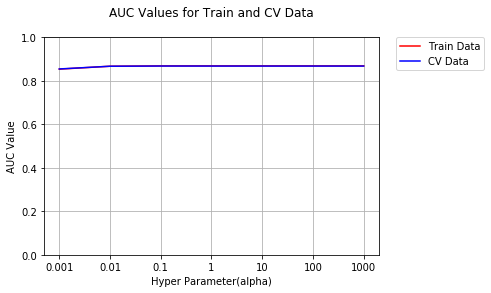

The optimal value of alpha =  0.1

Classifying Test Data


The AUC value for test data is  0.8634916470049169


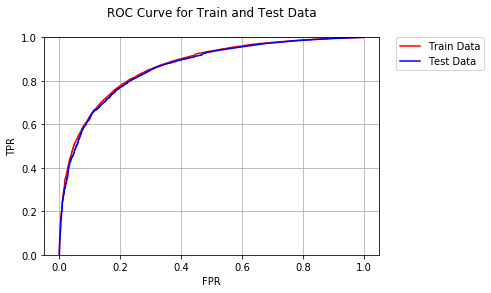

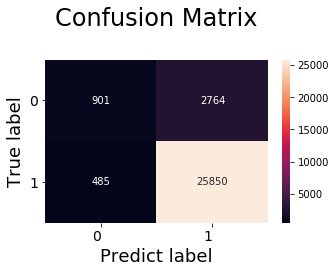

In [65]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
LR_all(train_tfw2v,test_tfw2v,cv_tfw2v,'l2')

# [6] Conclusions

In [38]:

# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+---------------+-----------------+------+---------------------------+
| Vectorizer | Regulariztion | Hyper Parameter | AUC  | Sparsity on Weight Vector |
+------------+---------------+-----------------+------+---------------------------+
|    BOW     |       L1      |        1        | 0.93 |            91.2           |
|    BOW     |       L2      |       0.1       | 0.94 |                           |
|   TFIDF    |       L1      |        1        | 0.95 |           96.25           |
|   TFIDF    |       L2      |        10       | 0.96 |                           |
|  AVG W2V   |       L1      |       0.1       | 0.89 |             10            |
|  AVG W2V   |       L2      |       0.1       | 0.89 |                           |
| TFIDF W2V  |       L1      |       0.1       | 0.86 |             6             |
| TFIDF W2V  |       L2      |       0.1       | 0.86 |                           |
+------------+---------------+-----------------+------+---------------------

1. This classifier is faster than the previous models with less training time.
2. TFIDF featurisation with L2 regularization gave almost 96% AUC value where as BOW with L2 regularization gave almost 94% of the same.
3. We can further improve the model by taking more data points, and by taking some other features that may provide us with better insight about the data.